# Unsupervised Learning
Unsupervised learning involves training models on data that is not labeled, aiming to find hidden patterns or structures within the data.

# Clustering: K-Means Clustering, Hierarchical Clustering
K-Means Clustering: A clustering algorithm that partitions the dataset into K clusters by minimizing the variance within each cluster.

Hierarchical Clustering: A clustering method that builds a hierarchy of clusters by successively merging or splitting clusters.

In [1]:
import numpy as np
import pandas as pd

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


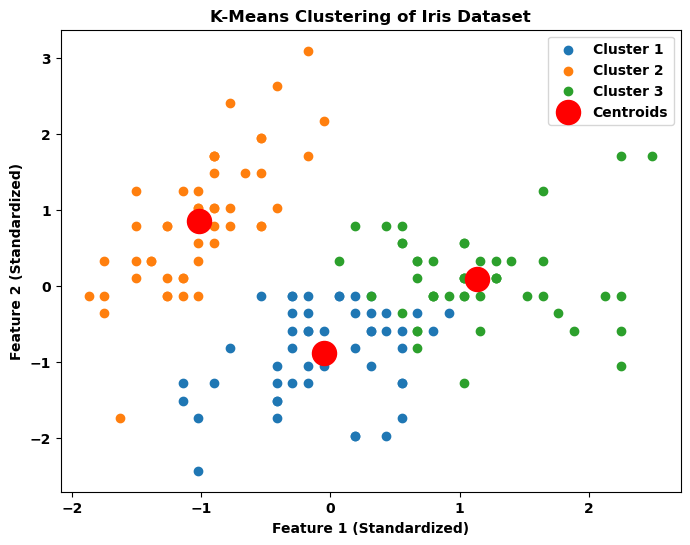

Cluster centers:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
data = load_iris()
x = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

# Plot the K-Means clustering results
plt.figure(figsize=(8,6))
for cluster in np.unique(y_kmeans):
    plt.scatter(x_scaled[y_kmeans == cluster, 0], x_scaled[y_kmeans == cluster, 1], label=f'Cluster {cluster+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

# Print cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

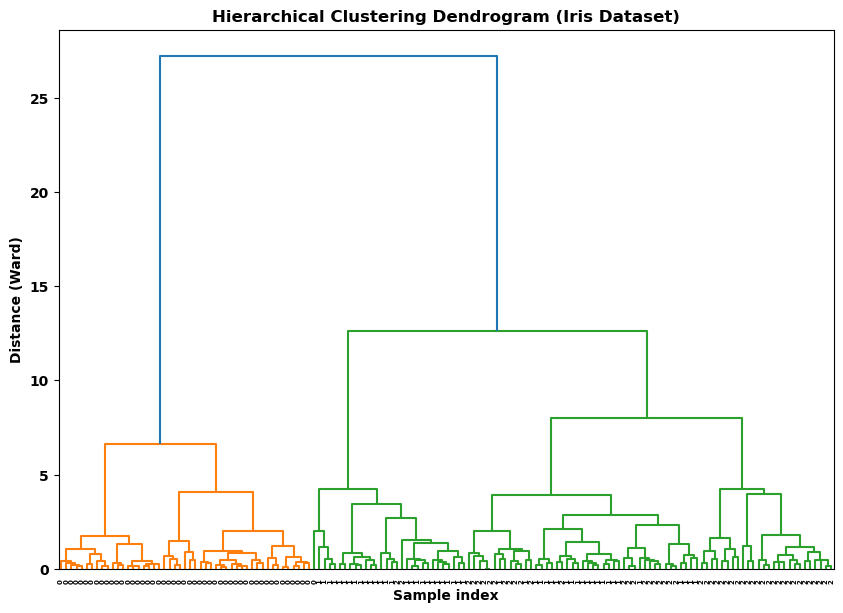

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
data = load_iris()
x = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform hierarchical clustering
Z = linkage(x_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=y, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample index')
plt.ylabel('Distance (Ward)')
plt.show()

# Dimensionality Reduction Techniques: PCA , LDA
PCA (Principal Component Analysis): PCA is a dimensionality reduction technique that transforms data into a set of linearly uncorrelated components (principal components) while retaining most of the variance.
    
LDA (Linear Discriminant Analysis): LDA is a dimensionality reduction technique that maximizes the separation between multiple classes by finding linear combinations of features.

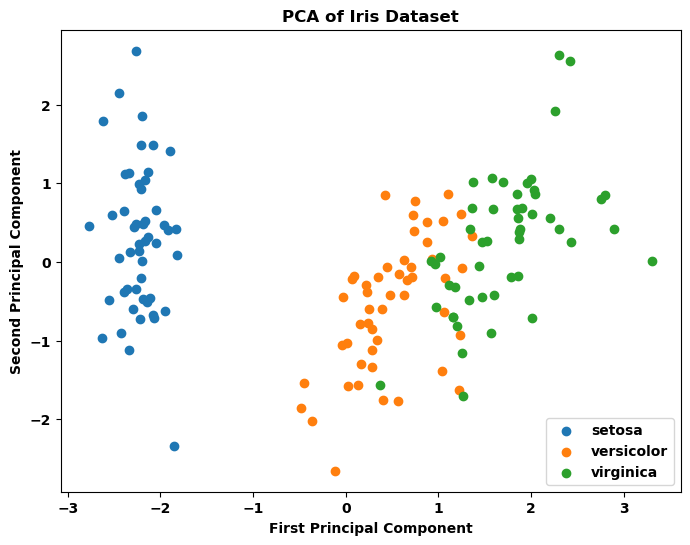

Explained variance ratio:  [0.72962445 0.22850762]


In [7]:
import numpy as np  # Ensure NumPy is imported
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
x = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
x_pca = pca.fit_transform(x_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(x_pca[y == target, 0], x_pca[y == target, 1], label=data.target_names[target])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

# Explained variance
print("Explained variance ratio: ", pca.explained_variance_ratio_)

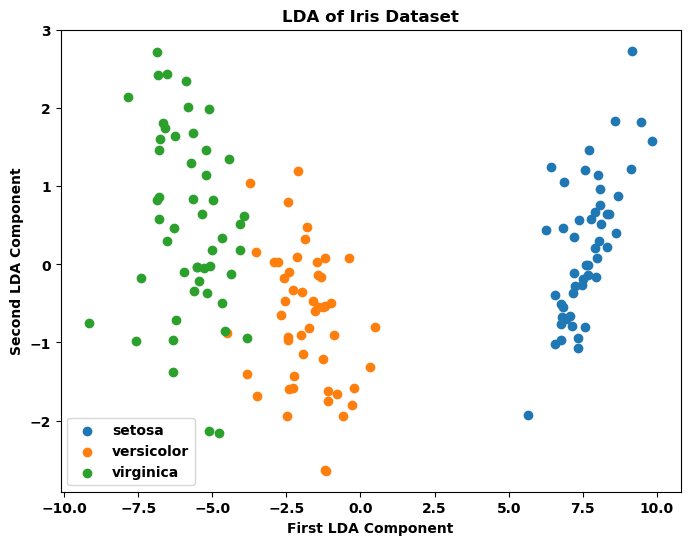

Explained variance by components:  [0.9912126 0.0087874]


In [5]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
data = load_iris()
x = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform LDA
lda = LDA(n_components=2)
x_lda = lda.fit_transform(x_scaled, y)

# Plot the LDA results
plt.figure(figsize=(8,6))
for target in np.unique(y):
    plt.scatter(x_lda[y == target, 0], x_lda[y == target, 1], label=data.target_names[target])
plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.legend()
plt.title('LDA of Iris Dataset')
plt.show()

# Print explained variance ratio
print("Explained variance by components: ", lda.explained_variance_ratio_)